In [85]:
import numpy as np

In [86]:
import pandas as pd

In [87]:
import matplotlib.pyplot as plt

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
n = r'C:\Users\Kush baba the great\Desktop\Datashapa\datasets\Feature engineering\housing.csv'

In [92]:
df = pd.read_csv(n)

INITIAL EXPLORATION

In [93]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [95]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [96]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [97]:
#identify duplicates
df.duplicated().sum()

0

total_bedrooms column has missing value 

No duplicates and all data types are correct apart from Ocean_proximity which will be encoded during feature engineering phase

DATA CLEANING

In [98]:
#Drop missing value 
df.dropna(subset=["total_bedrooms"],inplace = True)

FEATURE ENGINEERING

I will examine each column distribution with histogram. If it's Right Skewed I will apply log transformation. At the end of it will scale the numerical columns regardless their distribution (whether log transformed or not) and will detect outliers. the column "ocean_proximity" will need to be encoded as well since it's categorical value 

In [99]:
numeric_features = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]

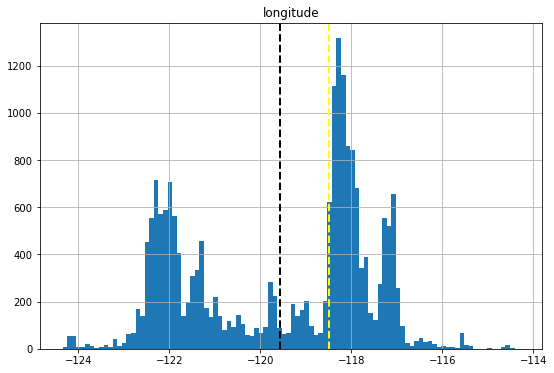

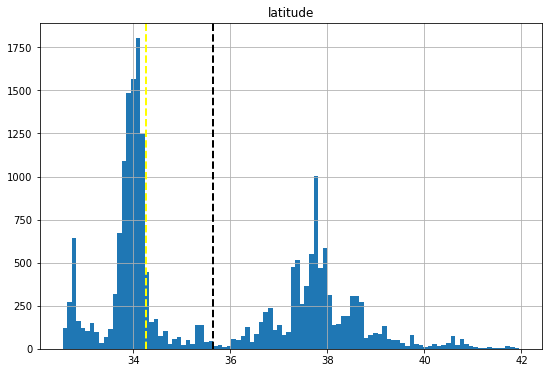

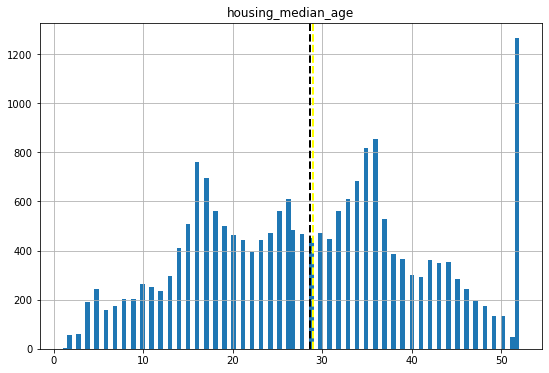

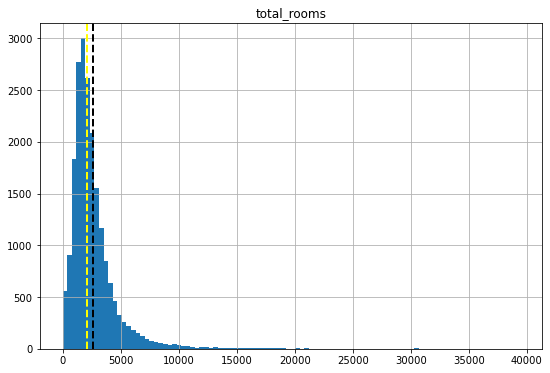

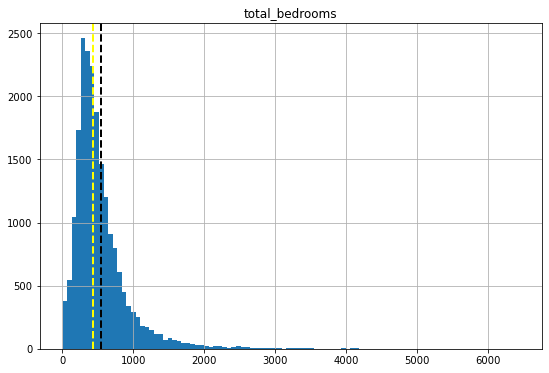

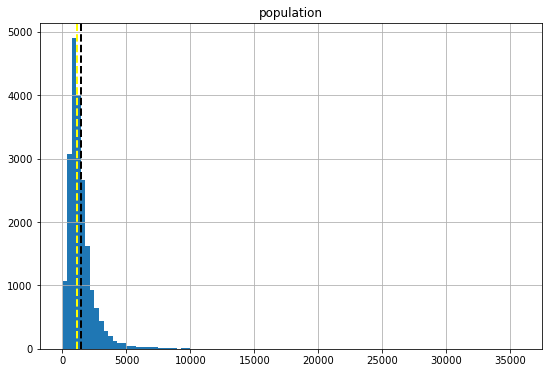

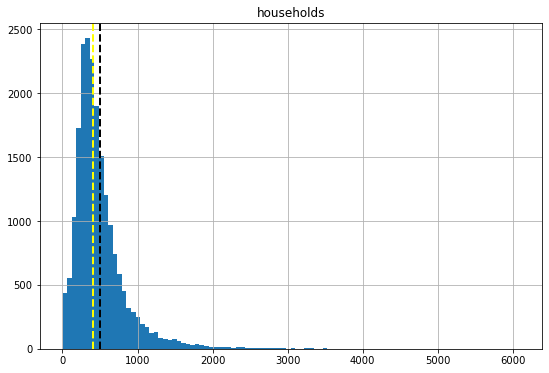

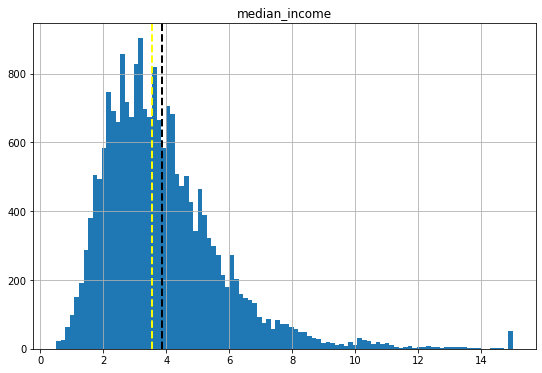

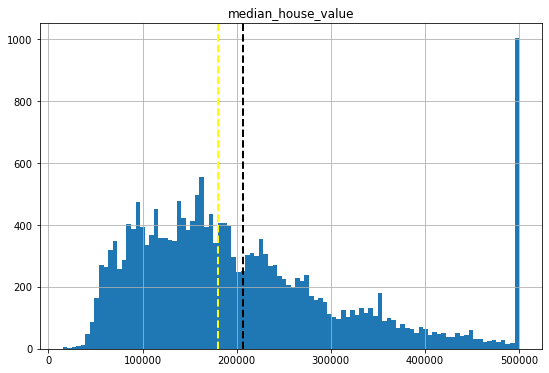

In [100]:
# Plot a histogram for each numeric feature and find out the distribution nature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='yellow', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Apart from longitude and housing_median_age all the columns are strongly right skewed hence LOG transformation will be applied to all those columns 

LOG transformation to latitude, total_rooms, total_bedrooms, population, households, median_income, median_house_value

In [101]:
df["latitude"] = np.log(df["latitude"])

In [102]:
df["total_rooms"] = np.log(df["total_rooms"])

In [103]:
df["total_rooms"] = np.log(df["total_rooms"])

In [104]:
df["total_bedrooms"] = np.log(df["total_bedrooms"])

In [105]:
df["population"] = np.log(df["population"])

In [106]:
df["households"] = np.log(df["households"])

In [107]:
df["median_income"] = np.log(df["median_income"])

In [108]:
df["median_house_value"] = np.log(df["median_house_value"])

Check the distribution again of the numeric features 

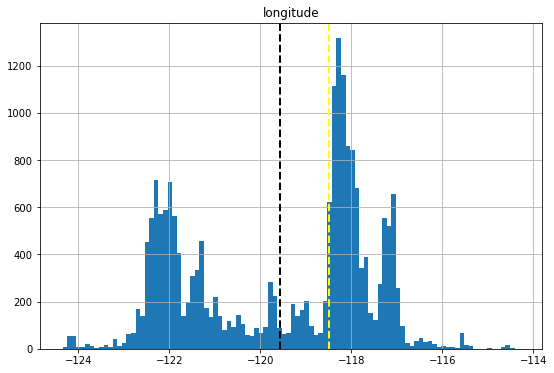

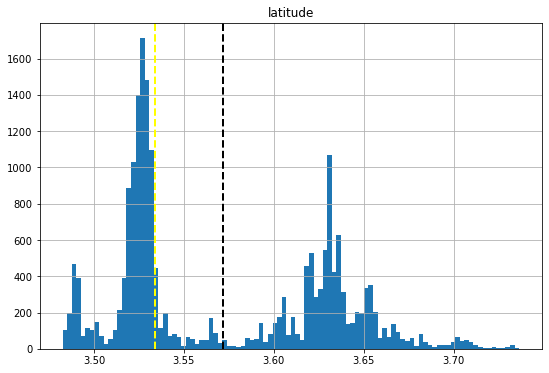

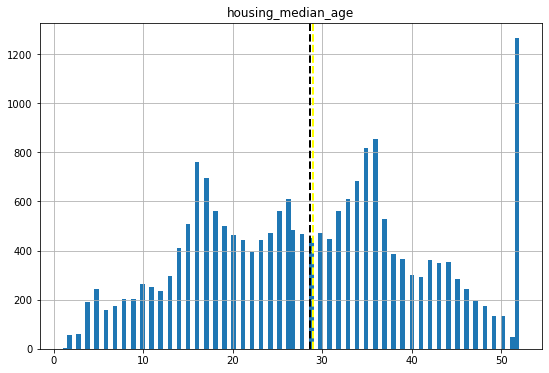

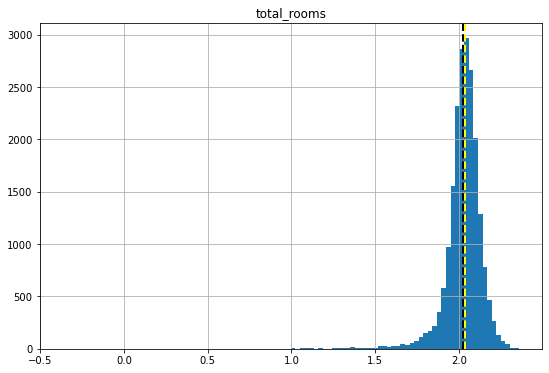

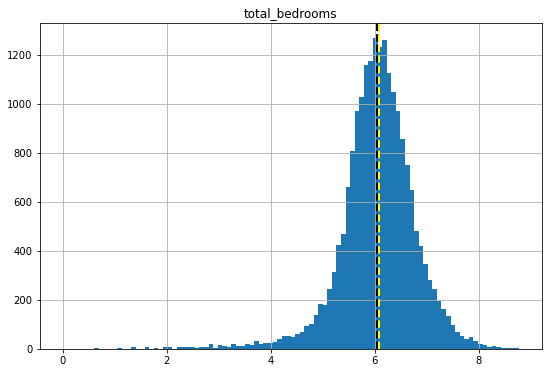

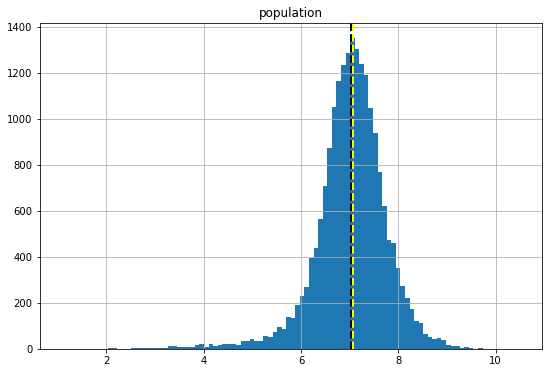

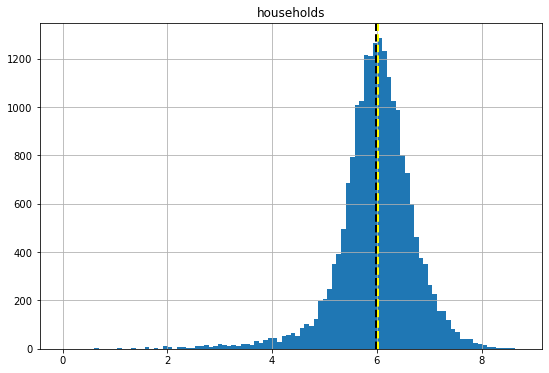

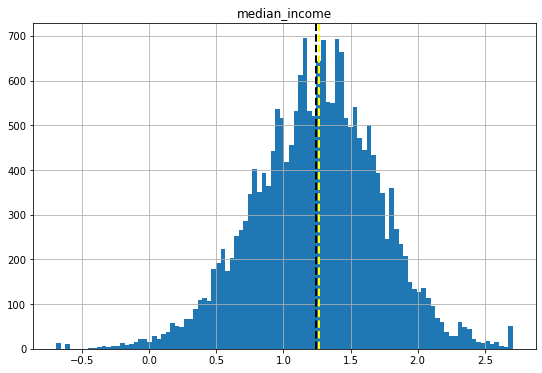

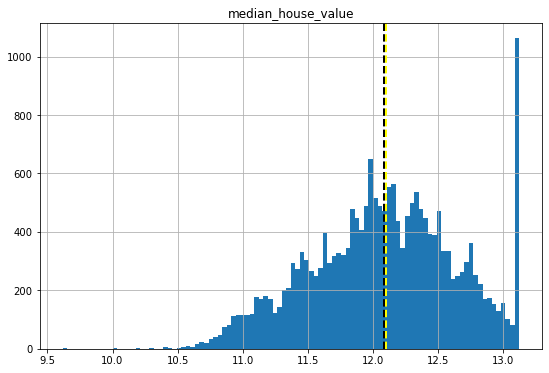

In [109]:
# Plot a histogram for each numeric feature and find out the distribution nature after LOG transformation
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='yellow', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Scale all the numeric features using standardization (z-score scaling) 

In [110]:
# Scale Longitude column
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df["longitude"] = scaler.fit_transform(df["longitude"].values.reshape(-1, 1))

In [111]:
# Scale latitude column
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df["latitude"] = scaler.fit_transform(df["latitude"].values.reshape(-1, 1))

In [112]:
# Scale housing_median_age column
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df["housing_median_age"] = scaler.fit_transform(df["housing_median_age"].values.reshape(-1, 1))

In [113]:
# Scale total_rooms column
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df["total_rooms"] = scaler.fit_transform(df["total_rooms"].values.reshape(-1, 1))

In [114]:
# Scale total_bedrooms column
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df["total_bedrooms"] = scaler.fit_transform(df["total_bedrooms"].values.reshape(-1, 1))

In [115]:
# Scale population column
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df["population"] = scaler.fit_transform(df["population"].values.reshape(-1, 1))

In [116]:
# Scale households column
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df["households"] = scaler.fit_transform(df["households"].values.reshape(-1, 1))

In [117]:
# Scale median_income column
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df["median_income"] = scaler.fit_transform(df["median_income"].values.reshape(-1, 1))

In [118]:
# Scale median_house_value column
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df["median_house_value"] = scaler.fit_transform(df["median_house_value"].values.reshape(-1, 1))

ONE-HOT Encode "ocean_proximity" column 

In [119]:
#I one-hot encode this column as it's a nominal categorical value
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [120]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327314,1.061638,0.982163,-1.021704,-1.625687,-1.691249,-1.560772,1.858507,1.647730,0,0,0,1,0
1,-1.322323,1.052727,-0.606210,1.418136,1.306611,1.028830,1.440800,1.852423,1.238249,0,0,0,1,0
2,-1.332305,1.048269,1.855769,-0.361221,-1.097264,-1.106337,-1.097230,1.566841,1.206603,0,0,0,1,0
3,-1.337296,1.048269,1.855769,-0.538781,-0.807183,-0.946872,-0.806829,1.032259,1.151872,0,0,0,1,0
4,-1.337296,1.048269,1.855769,-0.233087,-0.568084,-0.929993,-0.578028,0.217710,1.156498,0,0,0,1,0


DETECT OUTLIERS

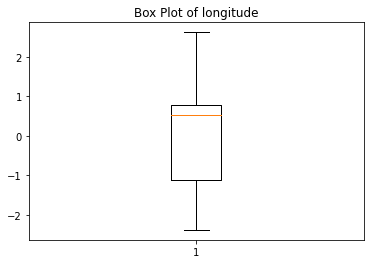

In [36]:
# Create a box plot to visualize outliers in column longitude
plt.boxplot(df['longitude'])
plt.title('Box Plot of longitude')
plt.show()

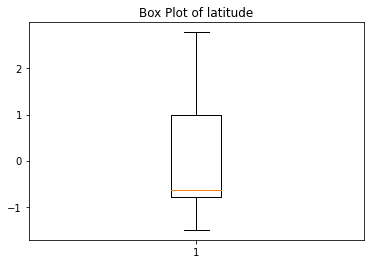

In [37]:
# Create a box plot to visualize outliers in column latitude
plt.boxplot(df['latitude'])
plt.title('Box Plot of latitude')
plt.show()

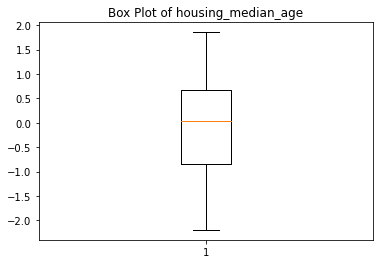

In [38]:
# Create a box plot to visualize outliers in column housing_median_age
plt.boxplot(df['housing_median_age'])
plt.title('Box Plot of housing_median_age')
plt.show()

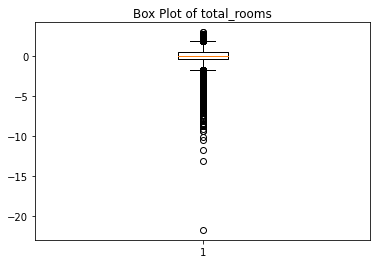

In [39]:
# Create a box plot to visualize outliers in column total_rooms
plt.boxplot(df['total_rooms'])
plt.title('Box Plot of total_rooms')
plt.show()

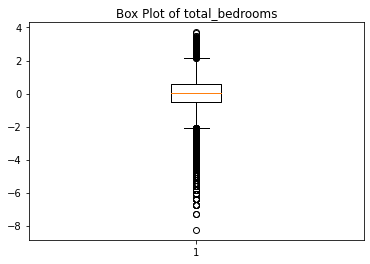

In [40]:
# Create a box plot to visualize outliers in column total_bedrooms
plt.boxplot(df['total_bedrooms'])
plt.title('Box Plot of total_bedrooms')
plt.show()

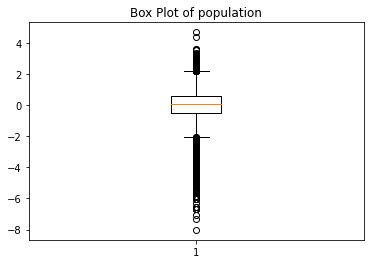

In [41]:
# Create a box plot to visualize outliers in population 
plt.boxplot(df['population'])
plt.title('Box Plot of population')
plt.show()

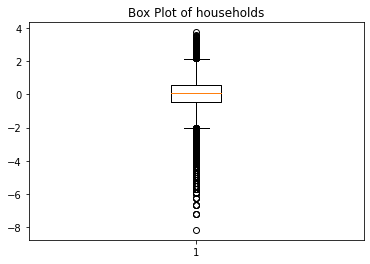

In [42]:
# Create a box plot to visualize outliers in households
plt.boxplot(df['households'])
plt.title('Box Plot of households')
plt.show()

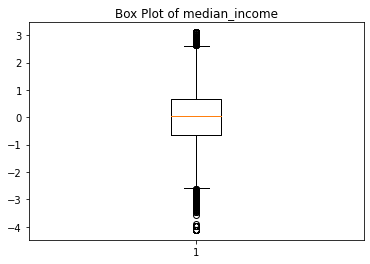

In [43]:
# Create a box plot to visualize outliers in median_income
plt.boxplot(df['median_income'])
plt.title('Box Plot of median_income')
plt.show()

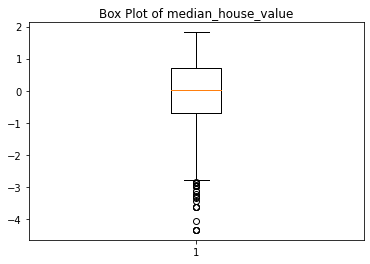

In [171]:
# Create a box plot to visualize outliers in median_house_value
plt.boxplot(df['median_house_value'])
plt.title('Box Plot of median_house_value')
plt.show()

I can see most of the columns have outliers so these need to be identified and removed 

In [121]:
# Deal with outliers
# For example, you can use z-score to remove rows with extreme values in certain columns:
z_scores = np.abs((df - df.mean()) / df.std())
df = df[(z_scores < 3).all(axis=1)]

I have checked the distribution of each column and applied Log transformation where necessary, scaled all numeric features using standardization , Encoded the categorical value , Detected and removed outliers. Now I will apply L1 Regularization Lasso (treating it as supervised model) and Dimensionality reduction technique (treating it as unsupervised model)

L1 Regularization Lasso 

SPLIT features and target variable 

In [73]:
# Split the data into features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [61]:
print(y)

0        1.647730
1        1.238249
2        1.206603
3        1.151872
4        1.156498
           ...   
20635   -1.439047
20636   -1.461686
20637   -1.145561
20638   -1.296523
20639   -1.201645
Name: median_house_value, Length: 19902, dtype: float64


In [64]:
from sklearn.linear_model import Lasso

In [65]:
# Create a Lasso regression model with a specified alpha (regularization strength)
alpha = 0.01  
lasso_model = Lasso(alpha=alpha)

In [68]:
# Fit the Lasso model to the data
lasso_model.fit(X,y)

Lasso(alpha=0.01)

In [71]:
feature_importance = lasso_model.coef_

In [72]:
#inspect the model coefficients to see feature importance
feature_importance = lasso_model.coef_
print('Feature Importance:')
for feature, coef in zip(X.columns, feature_importance):
    print(f'{feature}: {coef}')

Feature Importance:
longitude: -0.31991711129873235
latitude: -0.34812822947776156
housing_median_age: 0.07965155933286264
total_rooms: -0.0
total_bedrooms: 0.3206569324188491
population: -0.3847768585933718
households: 0.1251105487459821
median_income: 0.598829552586889
ocean_proximity_0: 0.008399375973091532
ocean_proximity_1: -0.5928567166258772
ocean_proximity_2: 0.0
ocean_proximity_3: 0.0
ocean_proximity_4: -0.0


median_income has the strongest positive impact and population has the strongest negative impact on model's prediction. total_rooms,ocean_proximity_2, ocean_proximity_3 and ocean_proximity_4 do not contribute to the model's prediction so can be exluded 

PCA feature selection for Unsupervised

Notes : if a column has zero value the final result will return NaN

In [139]:
from sklearn.decomposition import PCA

In [140]:
X = df1.drop('median_house_value', axis=1)

In [141]:
n_components = 8  # Specify the desired number of principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [142]:
principal_component_names = [f'PC{i}' for i in range(1, n_components + 1)]
df_pca = pd.DataFrame(data=X, columns=principal_component_names)

In [143]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
20635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df1 = df.drop(["ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND","ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN"],axis=1)

In [138]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327314,1.061638,0.982163,-1.021704,-1.625687,-1.691249,-1.560772,1.858507,1.647730
1,-1.322323,1.052727,-0.606210,1.418136,1.306611,1.028830,1.440800,1.852423,1.238249
2,-1.332305,1.048269,1.855769,-0.361221,-1.097264,-1.106337,-1.097230,1.566841,1.206603
3,-1.337296,1.048269,1.855769,-0.538781,-0.807183,-0.946872,-0.806829,1.032259,1.151872
4,-1.337296,1.048269,1.855769,-0.233087,-0.568084,-0.929993,-0.578028,0.217710,1.156498
